In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CSV dataset file name
file_name = 'D2.csv'

In [3]:
# Please put csv file in the same folder with this jupyter notebook
df = pd.read_csv(file_name)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

# Question 1: Preprocessing
- What pre-processing was required on the dataset (D2.csv) before building the clustering model on the chosen attributes?

#### Proposed changes:
- Readmitted is currently stored in binary format  while change and readmitted are bool. Will need to identify which format is required for use in clustering. 

In [5]:
print(df['time_in_hospital'].value_counts())

3     3705
2     3449
1     2896
4     2796
5     1958
6     1446
7     1157
8      768
9      521
10     388
11     337
12     218
13     213
14     148
Name: time_in_hospital, dtype: int64


In [6]:
print(df['num_medications'].value_counts())

15    1225
13    1189
14    1125
12    1123
16    1071
      ... 
67       1
68       1
72       1
61       1
66       1
Name: num_medications, Length: 69, dtype: int64


In [7]:
#"num_lab_procedures", "number_outpatient", "number_inpatient", "num_medications", "time_in_hospital"
print(df['num_lab_procedures'].value_counts())

1      731
43     510
40     473
44     472
45     451
      ... 
111      1
103      1
108      1
118      1
109      1
Name: num_lab_procedures, Length: 107, dtype: int64


In [8]:
print(df['number_outpatient'].value_counts())

0     15696
1      2081
2       970
3       538
4       291
5       126
6        91
7        57
8        31
9        24
10       20
11       14
13       12
14       11
12       10
15        6
24        3
16        2
17        2
27        2
20        2
19        2
22        2
26        1
29        1
42        1
36        1
25        1
37        1
18        1
Name: number_outpatient, dtype: int64


In [9]:
print(df['number_inpatient'].value_counts())

0     12825
1      3979
2      1627
3       759
4       338
5       185
6       102
7        65
8        40
9        28
11       18
10       16
12       10
14        2
15        2
13        2
19        1
16        1
Name: number_inpatient, dtype: int64


In [10]:
print(df.describe())

       admission_type_id  discharge_disposition_id  admission_source_id  \
count       20000.000000              20000.000000         20000.000000   
mean            1.818850                  3.194500             5.213500   
std             1.217624                  4.367233             3.102418   
min             1.000000                  1.000000             1.000000   
25%             1.000000                  1.000000             1.000000   
50%             1.000000                  1.000000             7.000000   
75%             3.000000                  3.000000             7.000000   
max             8.000000                 28.000000            25.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      20000.000000        20000.000000    20000.000000     20000.000000   
mean           4.226750           43.743700        1.304100        16.698200   
std            2.850428           19.947812        1.707592         8.049121   
min 

In [11]:
# check null
df.isnull().sum()


<bound method DataFrame.count of         race  gender    age  admission_type_id  discharge_disposition_id  \
0      False   False  False              False                     False   
1      False   False  False              False                     False   
2      False   False  False              False                     False   
3      False   False  False              False                     False   
4      False   False  False              False                     False   
...      ...     ...    ...                ...                       ...   
19995  False   False  False              False                     False   
19996  False   False  False              False                     False   
19997  False   False  False              False                     False   
19998  False   False  False              False                     False   
19999  False   False  False              False                     False   

       admission_source_id  time_in_hospital  medical_

##### Do we need to normalise number_inpatient, number_outpatient = 0

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


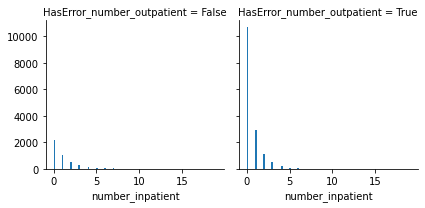

In [12]:

# create a mask of errorneous MeanHHSz values
df['HasError_number_outpatient'] = df['number_outpatient'] < 1

g = sns.FacetGrid(df, col='HasError_number_outpatient')
g = g.map(plt.hist, 'number_inpatient', bins=100)
plt.show()


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


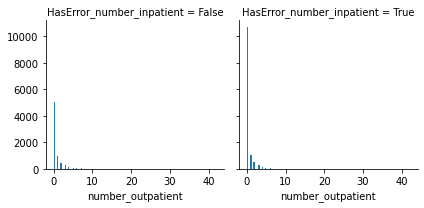

In [13]:

# create a mask of errorneous MeanHHSz values
df['HasError_number_inpatient'] = df['number_inpatient'] < 1
# use FaceTGrid to plot the distribution of MedHHInc when MeanHHSZ is errorneous
g = sns.FacetGrid(df, col='HasError_number_inpatient')
g = g.map(plt.hist, 'number_outpatient', bins=100)
plt.show()

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


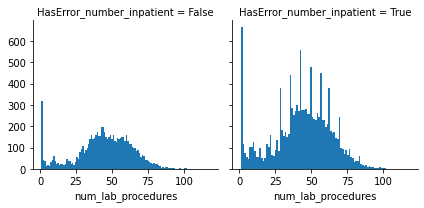

In [14]:
# create a mask of errorneous MeanHHSz values
df['HasError_number_inpatient'] = df['number_inpatient'] < 1
# use FaceTGrid to plot the distribution of MedHHInc when MeanHHSZ is errorneous
g = sns.FacetGrid(df, col='HasError_number_inpatient')
g = g.map(plt.hist, 'num_lab_procedures', bins=100)
plt.show()

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


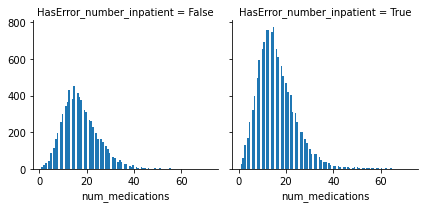

In [15]:
# create a mask of errorneous MeanHHSz values
df['HasError_number_inpatient'] = df['number_inpatient'] < 1
# use FaceTGrid to plot the distribution of MedHHInc when MeanHHSZ is errorneous
g = sns.FacetGrid(df, col='HasError_number_inpatient')
g = g.map(plt.hist, 'num_medications', bins=100)
plt.show()

In [16]:
# Consider with 0 num_inpatient and num_outpatient
# # before
# print("Row # before dropping errorneous rows", len(df))
# # a very easy way to drop rows with number_outpatient values below 1
# df = df[df['number_outpatient'] >= 1]
# df = df[df['number_inpatient'] >= 1]
# # after
# print("Row # after dropping errorneous rows", len(df))


In [17]:
# Preprocessing for Q2 - 3. 
#Create dataframe of selected variables for use in clustering model creation
df1 = df[["num_lab_procedures", "number_outpatient", "number_inpatient", "num_medications", "time_in_hospital"]]
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_lab_procedures  20000 non-null  int64
 1   number_outpatient   20000 non-null  int64
 2   number_inpatient    20000 non-null  int64
 3   num_medications     20000 non-null  int64
 4   time_in_hospital    20000 non-null  int64
dtypes: int64(5)
memory usage: 781.4 KB
None


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3260467595.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  num_lab_procedures_dist = sns.distplot(df1['num_lab_procedures'].dropna())


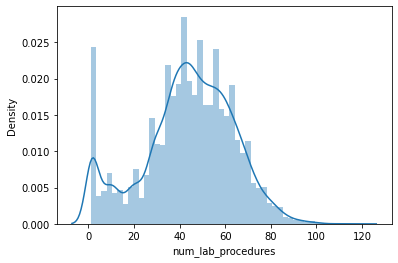

C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3260467595.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  number_outpatient_dist = sns.distplot(df1['number_outpatient'].dropna(), bins=100)


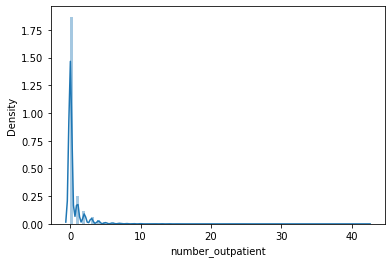

C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3260467595.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  number_inpatient_dist = sns.distplot(df1['number_inpatient'].dropna(), bins=100)


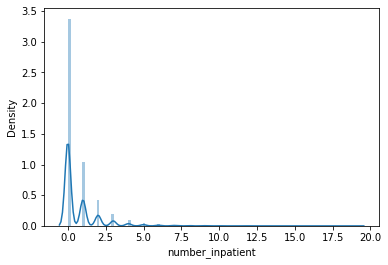

C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3260467595.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  num_medications_dist = sns.distplot(df1['num_medications'].dropna())


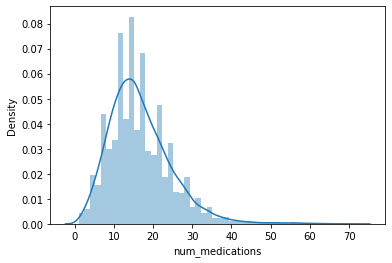

C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3260467595.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  time_in_hospital_dist = sns.distplot(df1['time_in_hospital'].dropna(), bins=100)


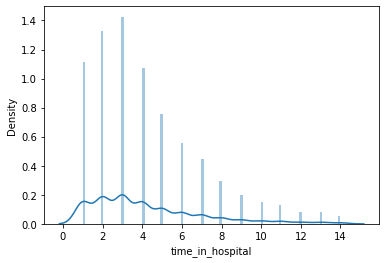

In [18]:
#visualise distribution of variables to identify potential data problems. 
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of num_lab_procedures
num_lab_procedures_dist = sns.distplot(df1['num_lab_procedures'].dropna())
plt.show()
# Distribution of number_outpatient
number_outpatient_dist = sns.distplot(df1['number_outpatient'].dropna(), bins=100)
plt.show()
# Distribution of number_inpatient
number_inpatient_dist = sns.distplot(df1['number_inpatient'].dropna(), bins=100)
plt.show()
# Distribution of num_medications
num_medications_dist = sns.distplot(df1['num_medications'].dropna())
plt.show()
# Distribution of time_in_hospital
time_in_hospital_dist = sns.distplot(df1['time_in_hospital'].dropna(), bins=100)
plt.show()

In [19]:
# Variables are on different scales, need to standardise the scaling of variables to allow for model accuracy. 
print(df1.describe())

       num_lab_procedures  number_outpatient  number_inpatient  \
count        20000.000000       20000.000000      20000.000000   
mean            43.743700           0.511950          0.701150   
std             19.947812           1.544272          1.345745   
min              1.000000           0.000000          0.000000   
25%             33.000000           0.000000          0.000000   
50%             45.000000           0.000000          0.000000   
75%             58.000000           0.000000          1.000000   
max            118.000000          42.000000         19.000000   

       num_medications  time_in_hospital  
count     20000.000000      20000.000000  
mean         16.698200          4.226750  
std           8.049121          2.850428  
min           1.000000          1.000000  
25%          11.000000          2.000000  
50%          15.000000          3.000000  
75%          21.000000          6.000000  
max          72.000000         14.000000  


In [20]:
#scaling process. 
from sklearn.preprocessing import StandardScaler

# convert df1 to matrix
X = df1.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
# preprocessing for Q4
print(df['age'].unique())

['[80-90)' '[70-80)' '[50-60)' '[40-50)' '[60-70)' '[90-100)' '[30-40)'
 '[10-20)' '[20-30)' '[0-10)']


In [22]:
# mapping
age_map = {'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10}
#print(age_map)
df['age'] = df['age'].map(age_map)
print(df['age'].unique())

[ 9  8  6  5  7 10  4  2  3  1]


In [23]:
#Create dataframe of selected variables for use in clustering model creation
df_age = df[["num_lab_procedures", "number_outpatient", "number_inpatient", "num_medications", "time_in_hospital", "age"]]
print(df_age.info())
print("AGE Values:", df_age['age'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_lab_procedures  20000 non-null  int64
 1   number_outpatient   20000 non-null  int64
 2   number_inpatient    20000 non-null  int64
 3   num_medications     20000 non-null  int64
 4   time_in_hospital    20000 non-null  int64
 5   age                 20000 non-null  int64
dtypes: int64(6)
memory usage: 937.6 KB
None
AGE Values: [ 9  8  6  5  7 10  4  2  3  1]


In [24]:
#from sklearn.preprocessing import StandardScaler
# convert df to matrix
X_age = df_age.to_numpy()

# scaling
scaler = StandardScaler()
X_age = scaler.fit_transform(X_age)

# Question 2 & 3 
## Clustering Model 1 without AGE 

### 3 dimensional => 3 clusters

In [25]:
#create model using scaled df created above

from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in 
# different centr
# model = KMeans(n_clusters=3, random_state=rs)
# model.fit(X)

# # sum of intra-cluster distances
# print("Sum of intra-cluster distance:", model.inertia_)

# print("Centroid locations:")
# for centroid in model.cluster_centers_:
#      print(centroid)

# Output number of centroid in 4 dimensional space

## MP Insights
- The greater the number of medications in cluster 0, the fewer visits to inpatient or outpatient hospital
- The number of medications for patients in cluster 2 doesn't seem to impact on their length of stay in hospital. 


### Determining K

In [26]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    # removed n_jobs
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

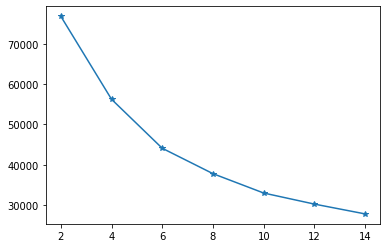

In [27]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [28]:
#Calculate silhouette scores for points k = 4, k = 6 and k = 8.
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.30012060858795403
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.20010629990287804
KMeans(random_state=42)
Silhouette score for k=8 0.2143068460864305


### MP Insights
WHYYY k=6 (not 4)
#### silhouette_score returns a mean silhouette score of 0.3 for k = 4, and 0.20 for k = 6, and 0.21 for k = 8
#### This shows k = 4 more approriate
- it appears that k=6 is the optimal number of clusters for this model according to the silhouette score. 

Sum of intra-cluster distance: 56236.379485682315
Centroid locations:
Cluster 0:  [ 0.04308724  4.038035    0.23623019  0.12702759 -0.02497738]
Cluster 1:  [0.05641421 0.08726438 2.83572398 0.15076266 0.09218879]
Cluster 2:  [ 0.71012619 -0.13696784 -0.15183449  0.85489997  1.00499808]
Cluster 3:  [-0.37529633 -0.15298308 -0.25266431 -0.46509602 -0.52796785]
Cluster membership
3    11896
2     6139
1     1336
0      629
Name: Cluster_ID, dtype: int64


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1139430185.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster_ID'] = y


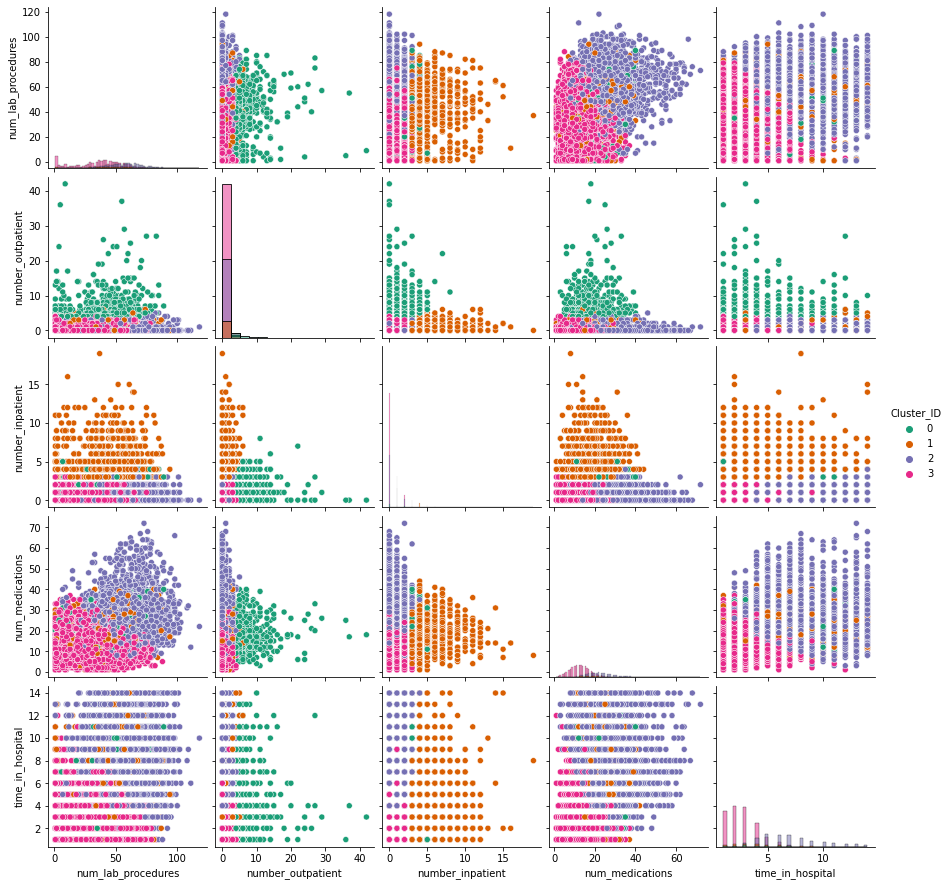

In [29]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for i, centroid in enumerate(model.cluster_centers_):
    print(f"Cluster {i}: ", centroid)

y = model.predict(X)
df1['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df1['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df1, hue='Cluster_ID', diag_kind='hist', palette='Dark2')
plt.show()

Distribution for cluster 0


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3173498050.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3173498050.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

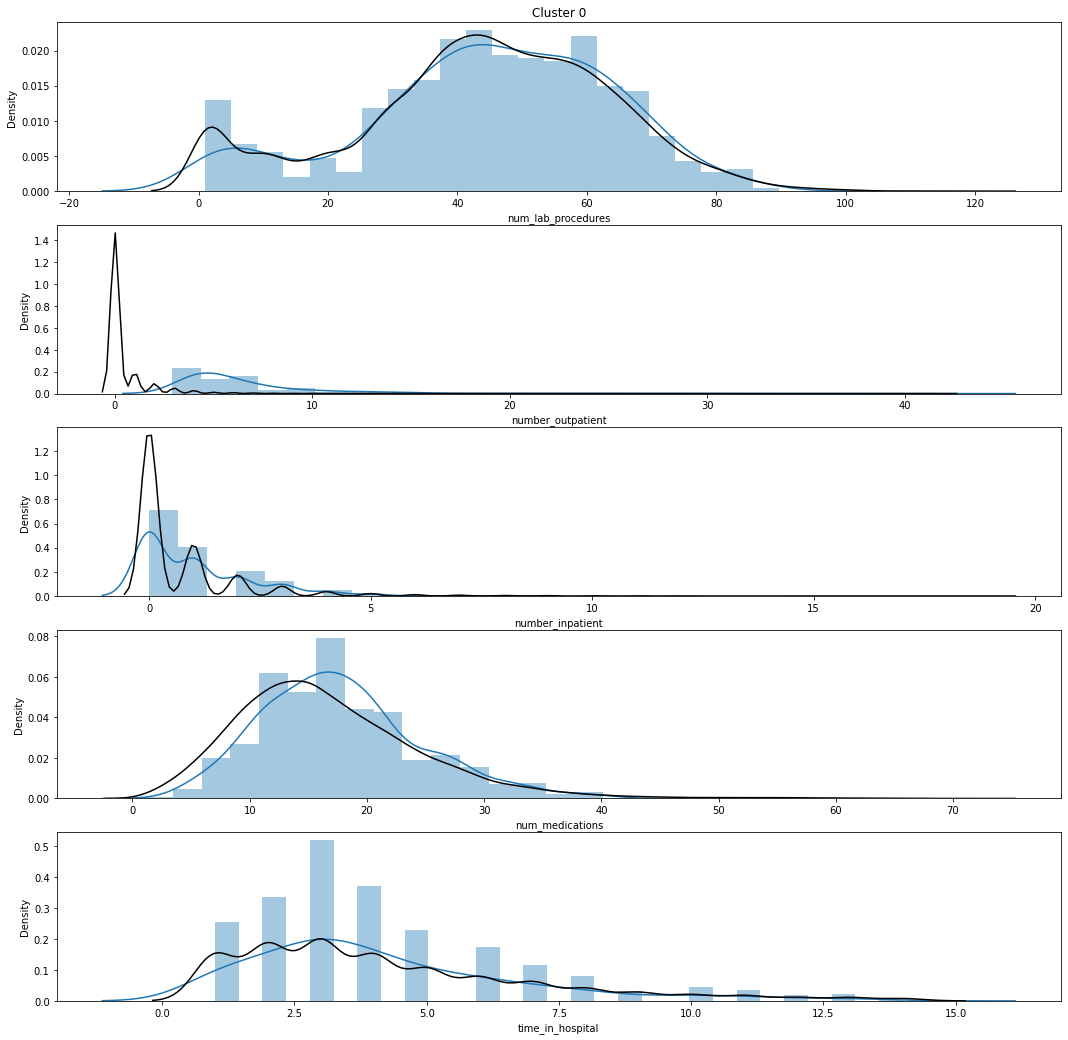

Distribution for cluster 1


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3173498050.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3173498050.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

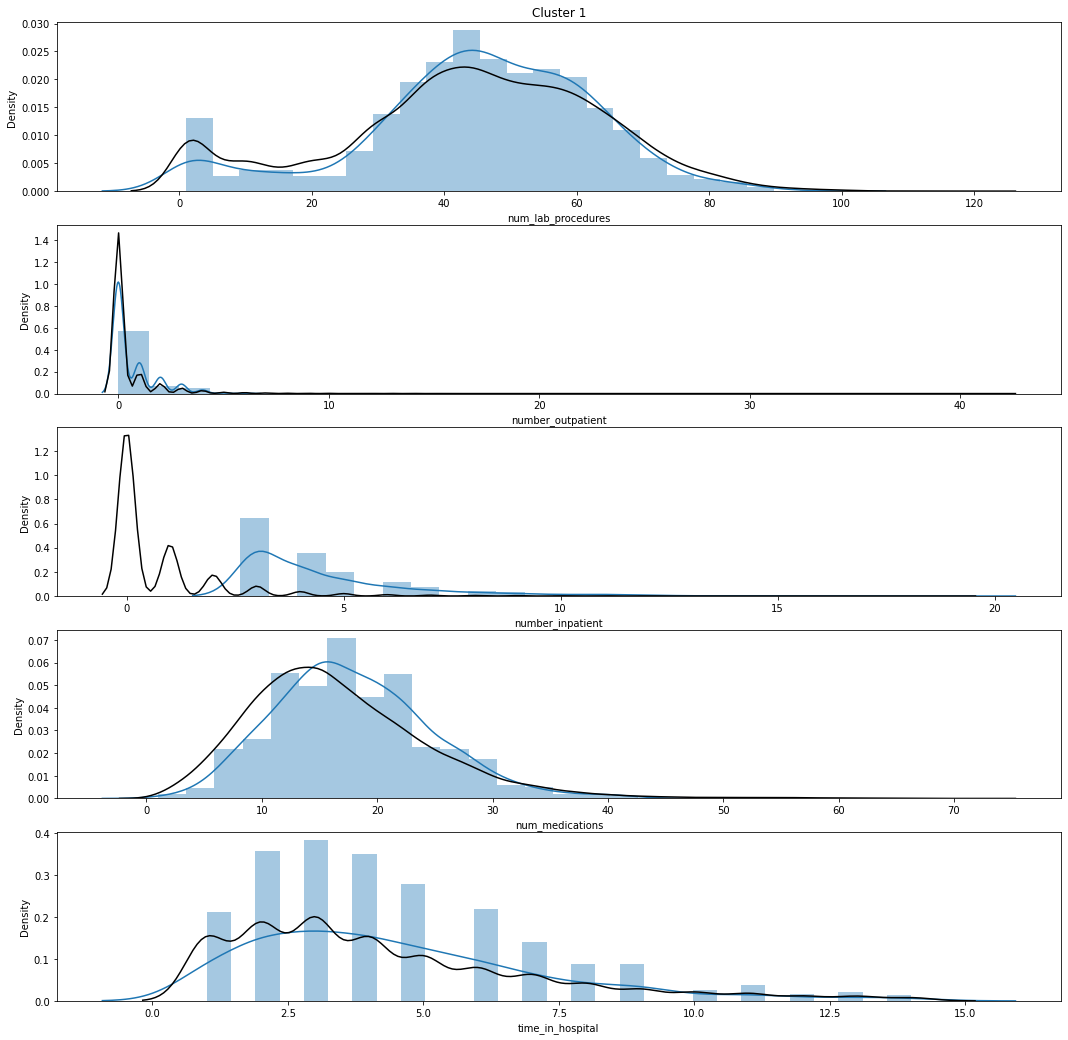

Distribution for cluster 2


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3173498050.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3173498050.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

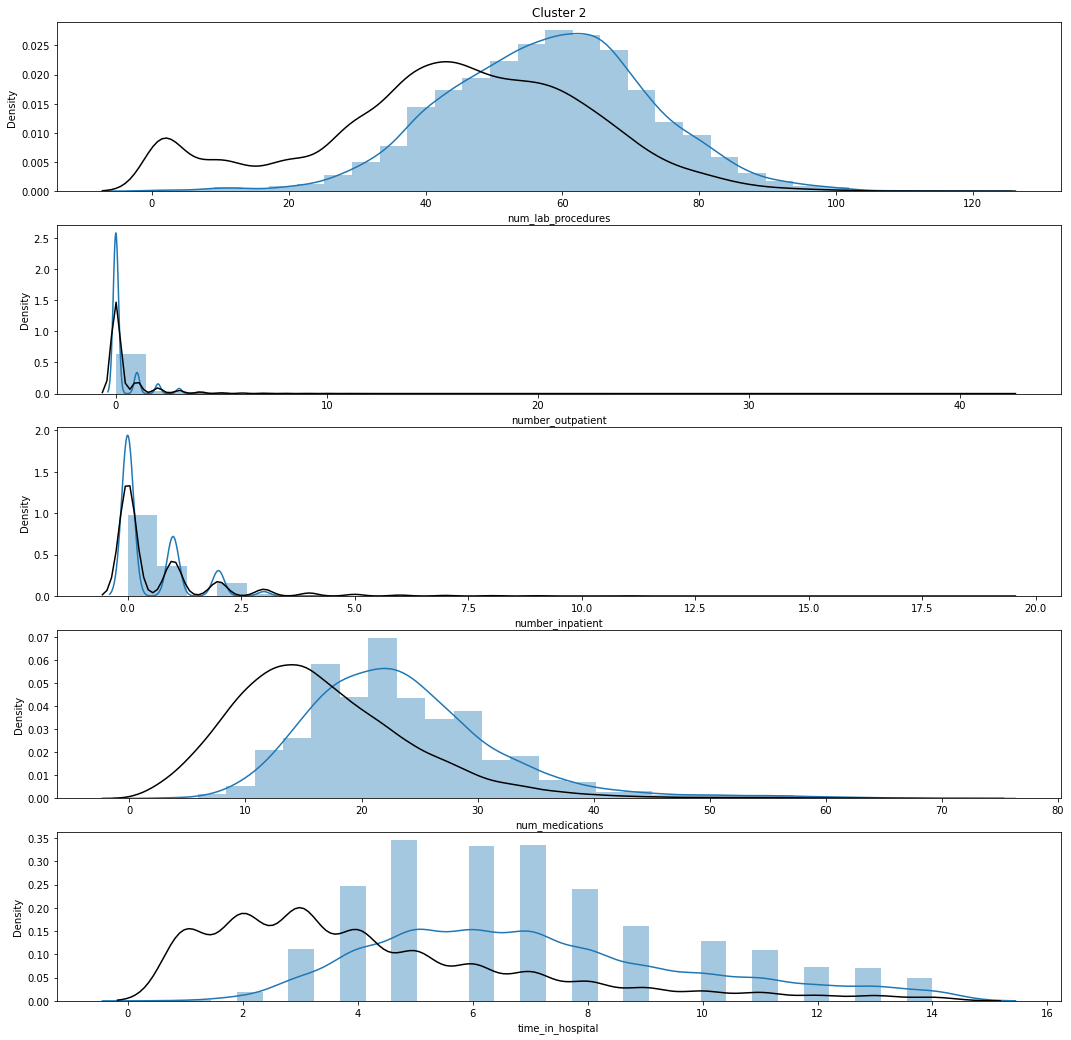

Distribution for cluster 3


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3173498050.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\3173498050.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

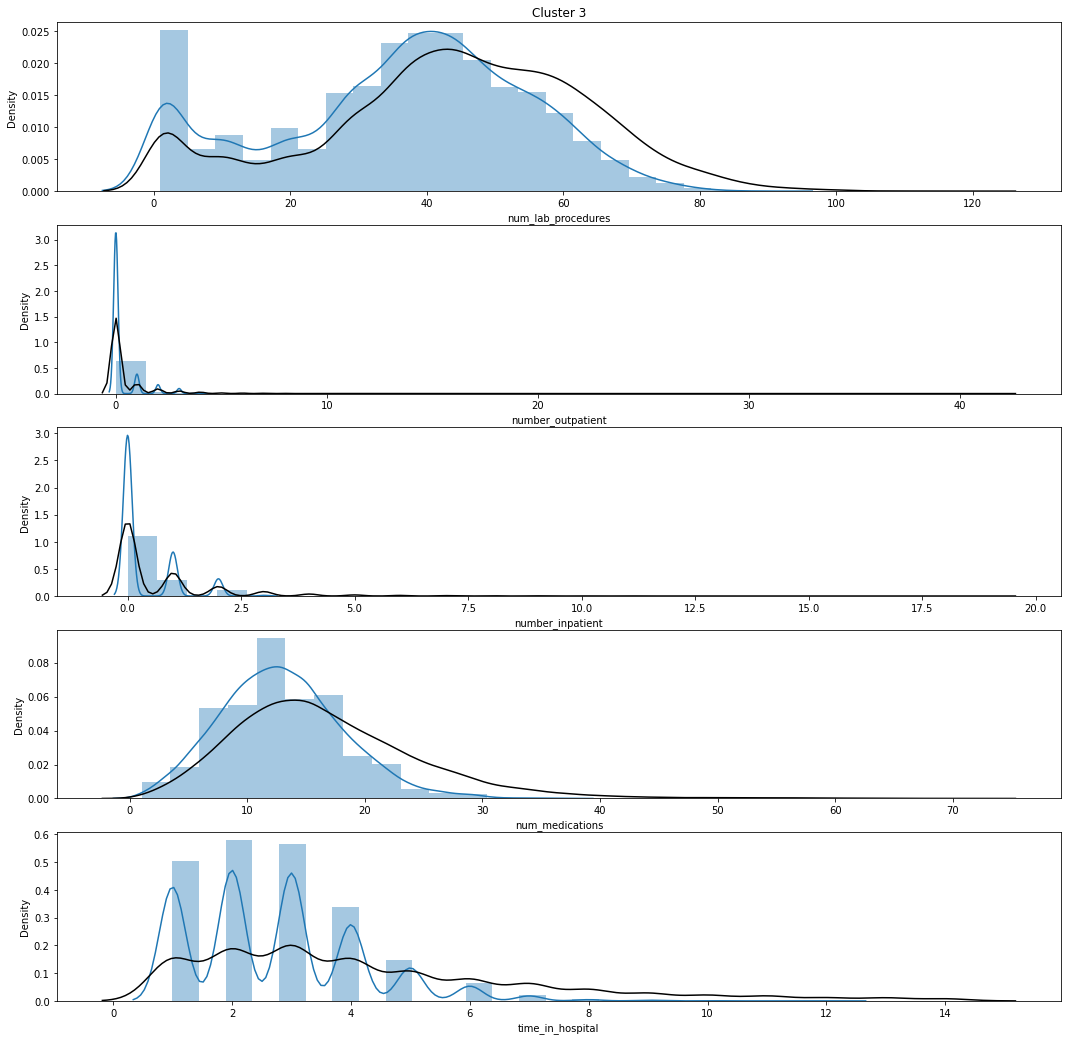

In [30]:
#create plots for each variable's distribution in a cluster against the overall data set distribution. 
# prepare the column and bin size. Increase bin size to be more specific, but 20 is
cols = ["num_lab_procedures", "number_outpatient", "number_inpatient", "num_medications", "time_in_hospital"]
n_bins = 20

# inspecting cluster 0 and 1
clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))
     
    # create subplots
    fig, ax = plt.subplots(nrows=5, figsize=(18, 18))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df1[col]), max(df1[col]), 30)
        # plot distribution of the cluster using histogram
        sns.distplot(df1[df1['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df1[col], bins=bins, ax=ax[j], hist=False, color="k")

    #plt.tight_layout()
    plt.show()

# Question 4
## Clustering Model 2 - includes AGE

####  Kprototypes is a clustering method that can handle both numeric and categorical variables (age: category)

In [31]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [32]:
# list to save the clusters and cost
clusters_age = []
cost_vals = []

# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X_age, categorical=[1])
    
    # append model to cluster list
    clusters_age.append(model)
    cost_vals.append(model.cost_)

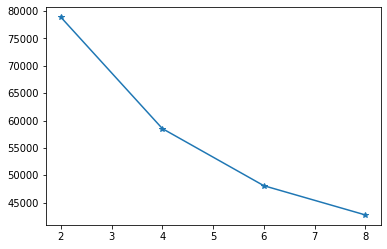

In [33]:
# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

#### K maybe = 4 or 6 or 8

In [34]:
X_num = [[row[0], row[1], row[2], row[3], row[4]] for row in X_age] # Variables of X with numeric datatype
X_cat = [[row[5]] for row in X_age] # variables of X with categorical datatype

In [35]:
from sklearn.metrics import silhouette_score
def cal_Silhouetter(base_model, k):
    # Calculate the Silhouette Score for the numeric and categorical variables seperately
    silScoreNums = silhouette_score(X_num, base_model.fit_predict(X_age,categorical=[1]), metric='euclidean')
    print("Silscore for numeric variables: " + str(silScoreNums))
    silScoreCats = silhouette_score(X_cat, base_model.fit_predict(X_age,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
    print("Silscore for categorical variables: " + str(silScoreCats))
    # Average the silhouette scores
    silScore = (silScoreNums + silScoreCats) / 2
    print(f"The avg silhouette score for k={k}: " + str(silScore))


### K = 4

In [36]:
model = clusters_age[1] # cluster[1] holds the K-prtotypes model with K=4
cal_Silhouetter(model, k=4)

Silscore for numeric variables: 0.06604162216762902
Silscore for categorical variables: 0.04881865426788596
The avg silhouette score for k=4: 0.057430138217757484


### K = 6

In [37]:
model = clusters_age[2] # cluster[1] holds the K-prtotypes model with K=6
cal_Silhouetter(model, k=6)

Silscore for numeric variables: 0.09280739108831072
Silscore for categorical variables: -0.0227689498242985
The avg silhouette score for k=6: 0.03501922063200611


### K = 8

In [38]:
model = clusters_age[3] # cluster[1] holds the K-prtotypes model with K=8
cal_Silhouetter(model, k=8)

Silscore for numeric variables: 0.09495191960228075
Silscore for categorical variables: -0.07025712845385672
The avg silhouette score for k=8: 0.012347395574212015


Sum of intra-cluster distance: 75402.99187569953
Centroid locations:
Cluster 0:  [-0.291959   -0.114709   -0.19629998 -0.39454727 -0.44984517  0.56437638]
Cluster 1:  [-0.27494959 -0.14482267 -0.23211399 -0.40466147 -0.46210408 -1.27814764]
Cluster 2:  [ 0.7430679  -0.11482005 -0.07601014  1.00719368  1.18979329  0.19484977]
Cluster 3:  [ 0.07539999  1.72794657  2.43730643  0.20474947  0.07593148 -0.18337455]
Cluster membership
0    9022
2    5091
1    4569
3    1318
Name: Cluster_ID, dtype: int64


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\268913138.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Cluster_ID'] = y


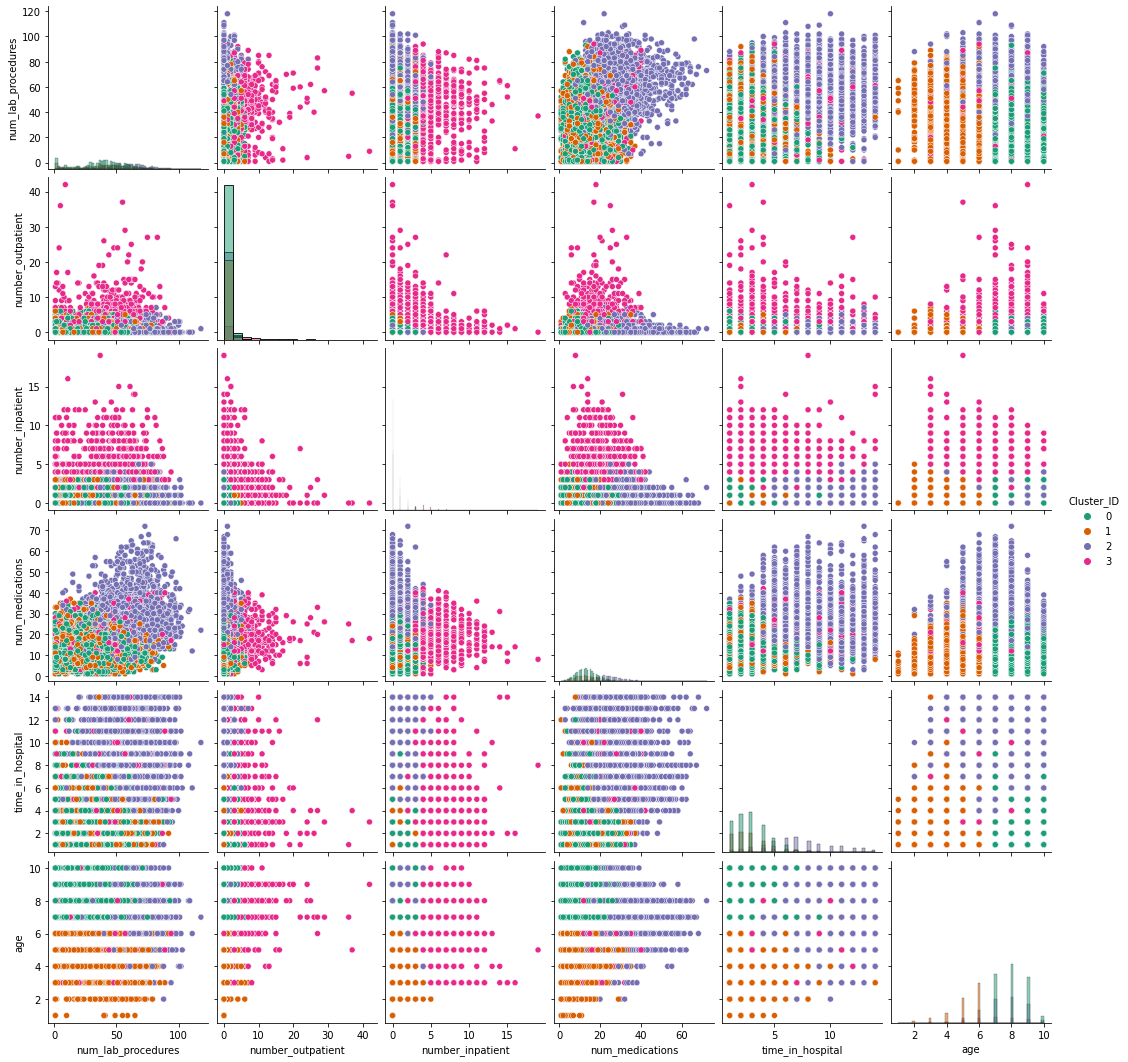

In [39]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X_age)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for i, centroid in enumerate(model.cluster_centers_):
    print(f"Cluster {i}: ", centroid)

y = model.predict(X_age)
df_age['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df_age['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df_age, hue='Cluster_ID', diag_kind='hist', palette='Dark2')
plt.show()

Distribution for cluster 0


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1528043473.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_age[df_age['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1528043473.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

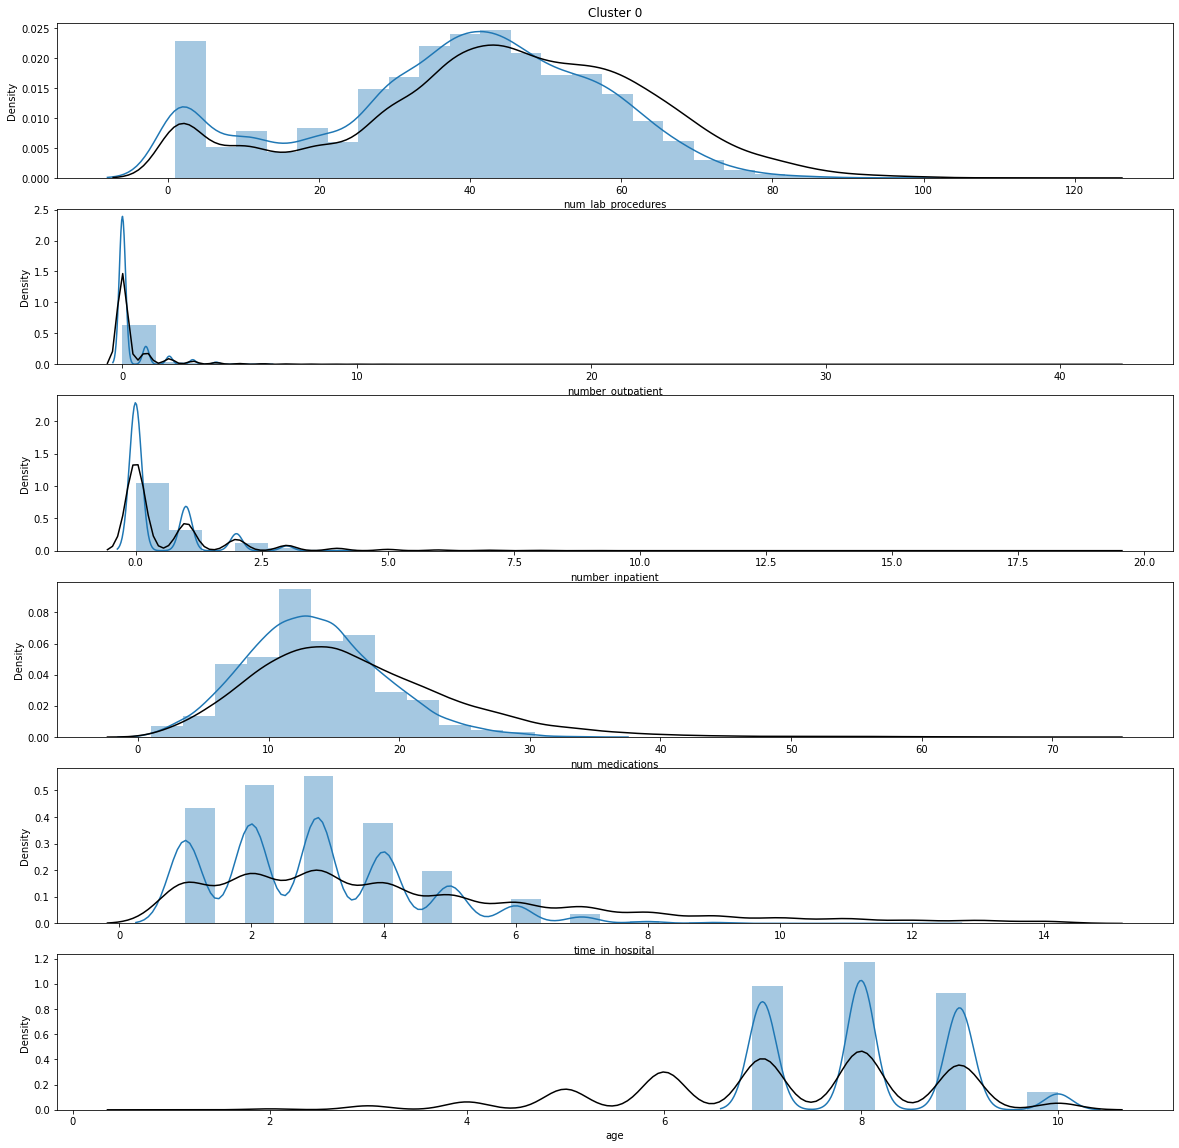

Distribution for cluster 1


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1528043473.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_age[df_age['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1528043473.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

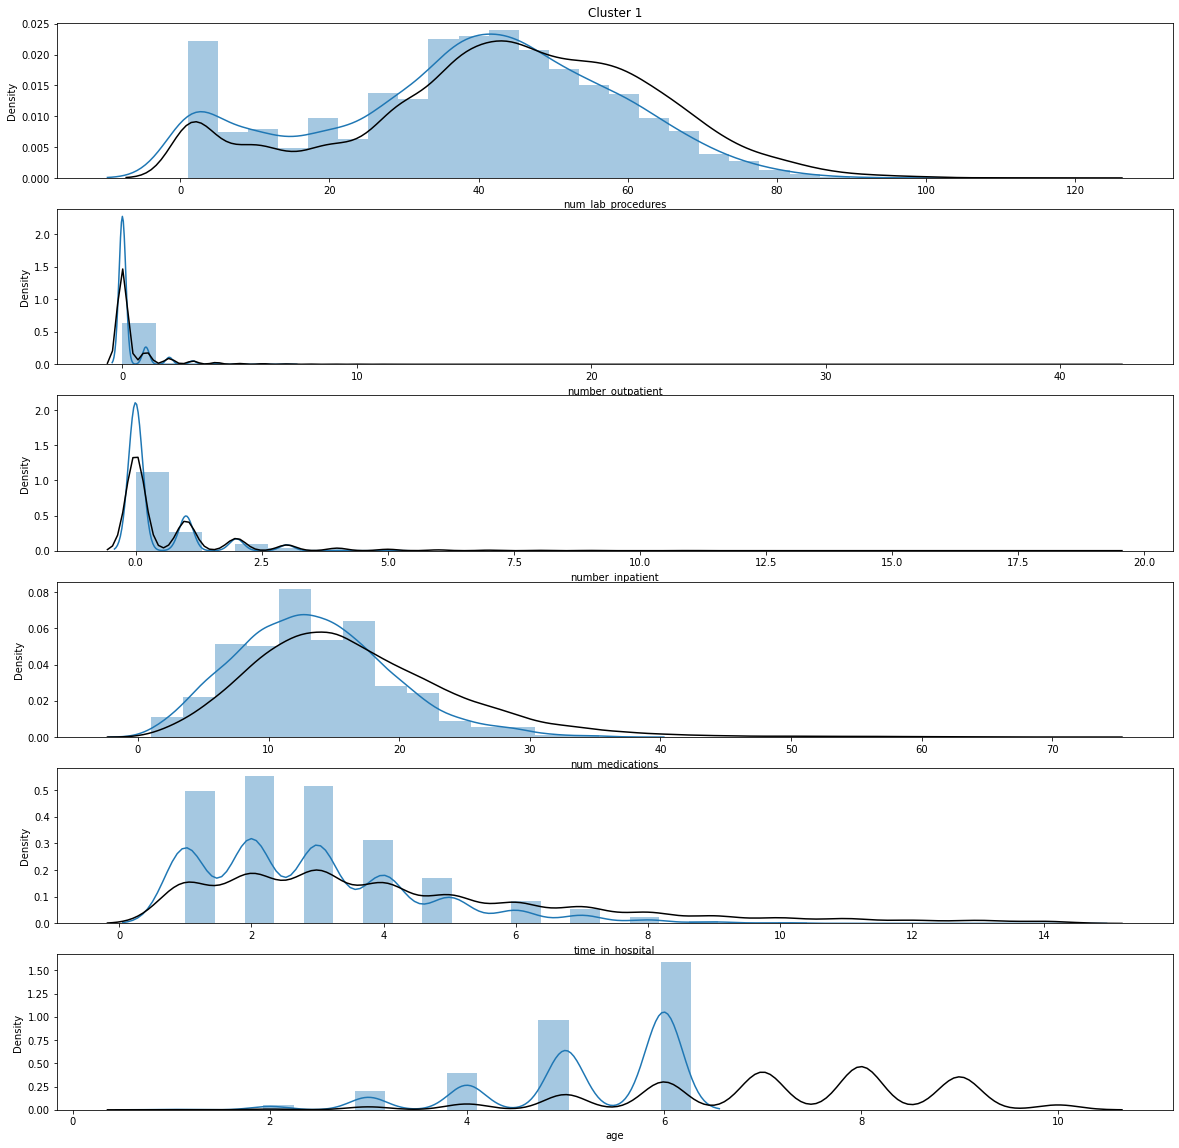

Distribution for cluster 2


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1528043473.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_age[df_age['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1528043473.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

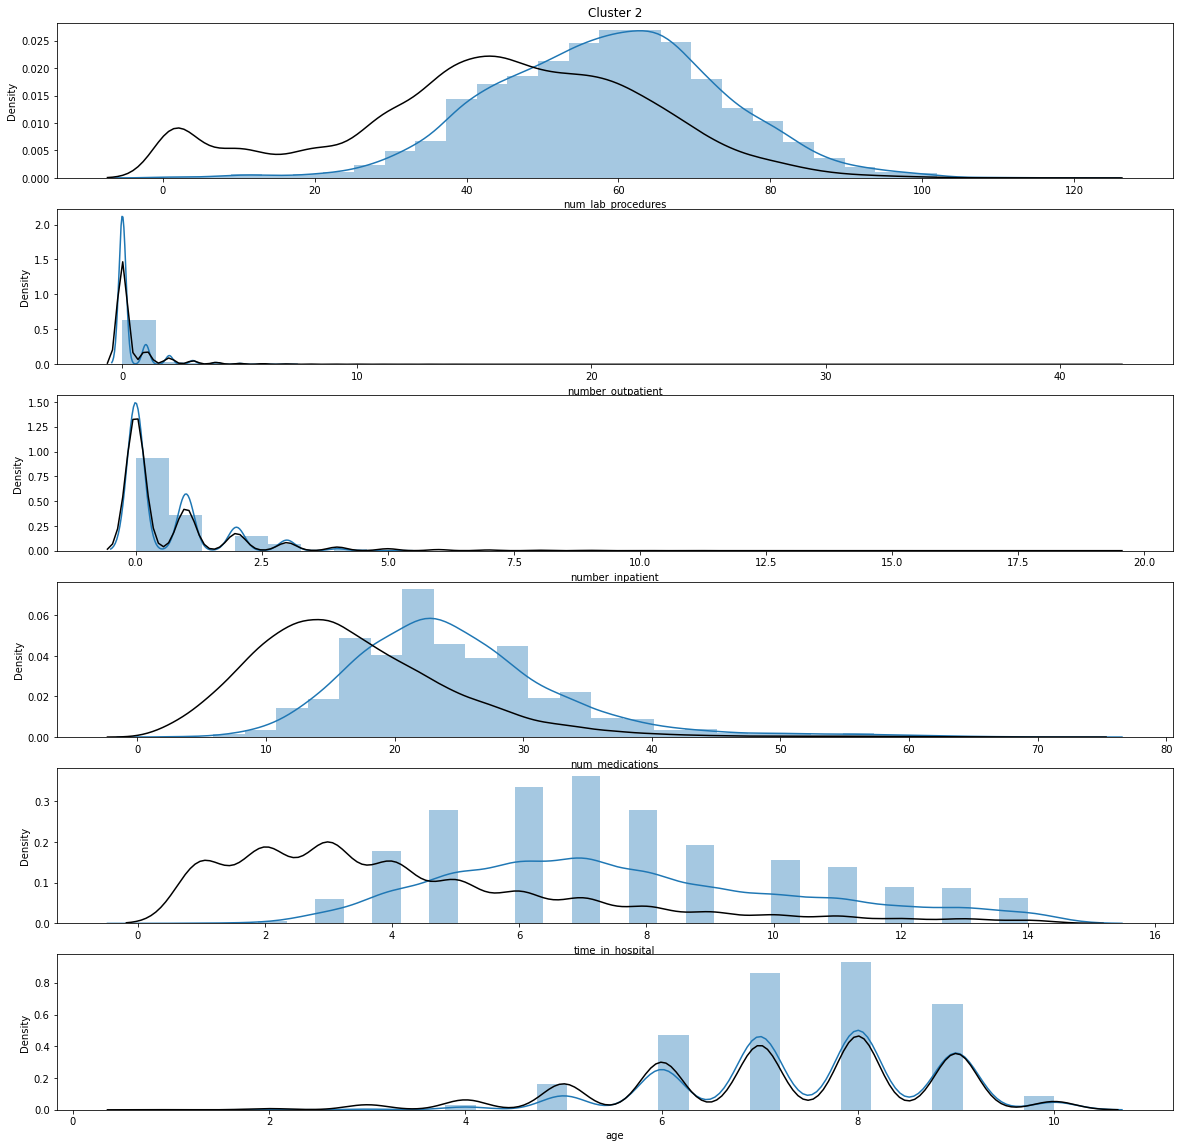

Distribution for cluster 3


C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1528043473.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_age[df_age['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_17808\1528043473.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

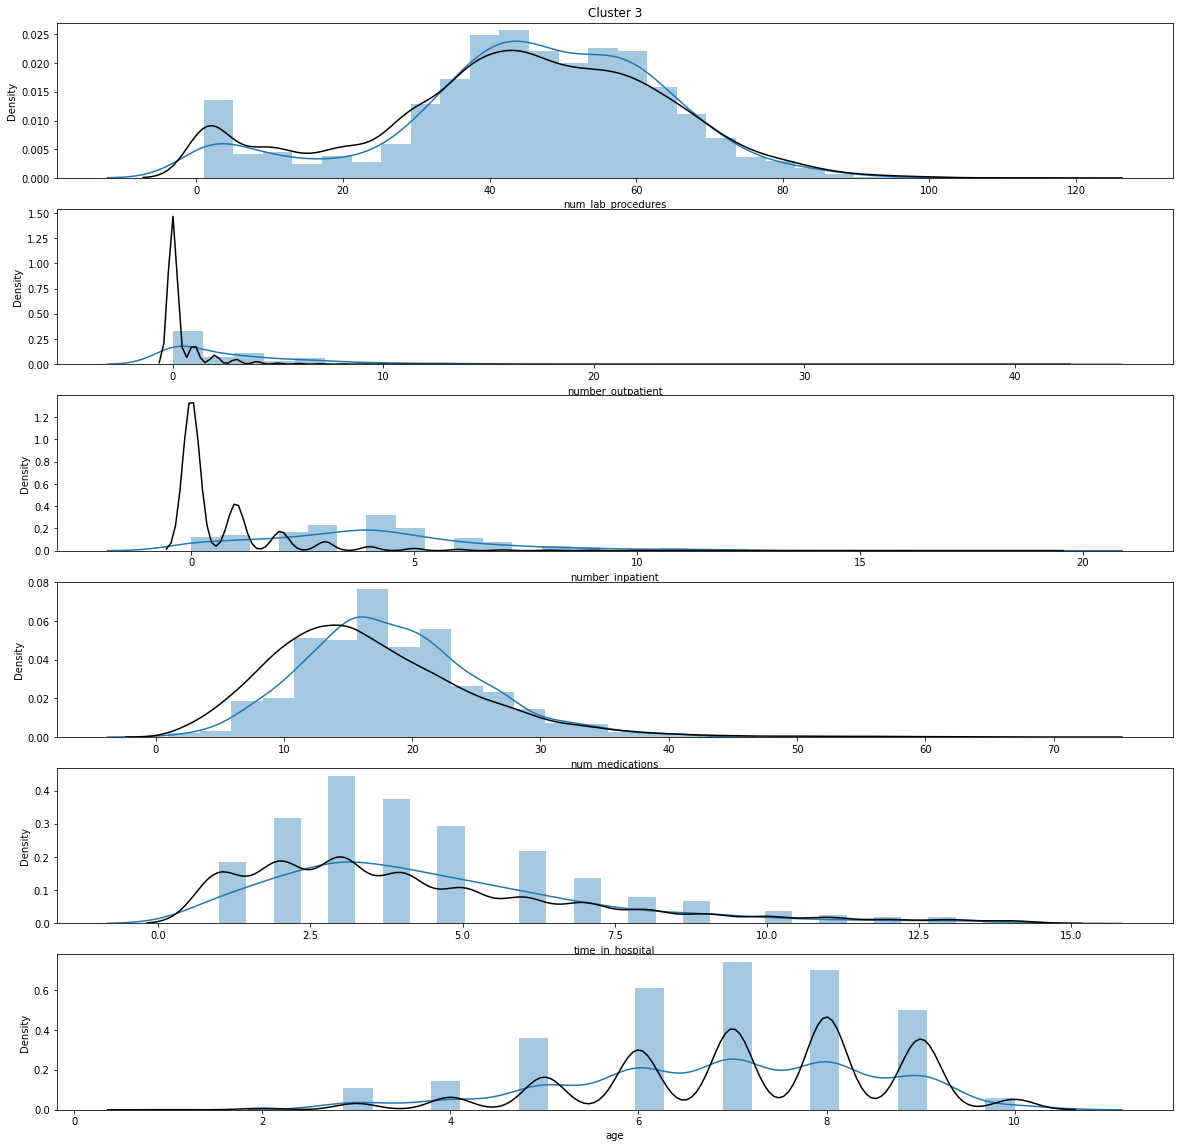

In [41]:
#create plots for each variable's distribution in a cluster against the overall data set distribution. 
# prepare the column and bin size. Increase bin size to be more specific, but 20 is
cols = ["num_lab_procedures", "number_outpatient", "number_inpatient", "num_medications", "time_in_hospital", "age"]
n_bins = 20

# inspecting cluster 0 and 1
clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))
     
    # create subplots
    fig, ax = plt.subplots(nrows=6, figsize=(20, 20))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_age[col]), max(df_age[col]), 30)
        # plot distribution of the cluster using histogram
        sns.distplot(df_age[df_age['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_age[col], bins=bins, ax=ax[j], hist=False, color="k")

    #plt.tight_layout()
    plt.show()